# **Predictive model to predict Pima Indians Diabetes**

## **Project motivation**

In these project we want to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

## **The Dataset**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 

### **Data Description**
The datasets consists of several medical predictor variables and one target variable, Outcome (1 - diabetes, 0 = no diabetes)

## **Analaysis Plan**

Here we want to predict whether ot not the patient has diabetes. the target will be 1 or 0 , so it is a supervised binary classification problem. the follwing steps will be followed:


1.   Cleaninng Data
2.   Explarotaory data analysis to discover an intitial insights.
3.   Select the suitable algorithm (KNN, logestic regression, Tree classification,svm)
4.   Fit the data to the model, fine tune, evaluate and validate.


**Note :** 


1- The data also is old from 1998, so we dont really know how much it is accurate. <br>
2- the data is just from female participants so in the machine learning we will just predict the dibetes for the females . 
the data also is so small ,we dont have a lot of records to predict and make a generalization.<br>
3- In the data there is no id for each participant so we could not know if there is a duplicate or if there is some participnats who make the test two times. 







# **Importing Data**



In [ ]:
import pandas as pd
import numpy as np
#for visualization
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns



### Import the Data

In [ ]:
diabetes=pd.read_csv("/content/drive/MyDrive/Pima Indians Diabetes project/diabetes.csv")


# **EDA - explorotary data analysis**

---
Take a peek at the first 5 rows of the data to know how it is look like.

---


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


CHecking Data type and the non-null count

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---
- There is no NAN values in our dataset.
- All the types are int and float, all of them are numeric. 
- There is 8 features, and 1 target (outcome)

---


---
**Features :**
- **Pregnancies** : how much time the participant was pregnant.
- **Glucose** : glucose level after 2 hours of tolerance test.
- **Blood Pressure** : diastolic blood pressure
- **skinThickness**:
- **Insulin**: the level of insulin after 2 hours of tolerance test.
- **BMI**:body mass index 
- **DiabetesPedigree function** : the likelihood of diabetes based on family history.
- **Age** : age of the participant.
---



In [ ]:
# check the dataset shape
print("The dataset is comprised of {} observations and {} features ".format(diabetes.shape[0],diabetes.shape[1]-1))
 


The dataset is comprised of 768 observations and 8 features 


---

The dataset is comprised of 768 observations and 8 features .

---



## **Descriptive statistics**


#### Descriptive statistics for all the dataset

In [ ]:
diabetes.drop('Outcome',axis=1).describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


####  Descriptive statistics for the diabetic paticipnats



In [ ]:
diabetes[diabetes['Outcome']==1].drop('Outcome',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00


#### Descriptive statistics for healthy participants

In [ ]:
diabetes[diabetes['Outcome']==0].drop('Outcome',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000


# **Data Validation & Preprocessing**

### **Data cleaning**



**checklist**


*   **Null data**- there is no null data in our dataset.
*   **Duplicates** - we can't check it here because there is no patient Id.
*   **Mismached data types** - in our dataset the datatype is matched.


### **Data validation**
**checklist**
 *   **Data range** - range of BMI/Insulin/Glucose
 *    **Data constraints** - checks that data meets certain conditions- Like if some data must be whole numbers.
 *    **Data Consistency** - check if the data make sense - like age/BMI/etc can't be negative 





In [ ]:
# Check he missing values 
print(" Count if missing values in each column of the dataset:")
diabetes.isnull().sum()

 Count if missing values in each column of the dataset:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Unique values 


In [ ]:
#Here we want to check the count of the unique values for each categorica
for column in diabetes.columns:
 print("There is {} unique values in {} column".format(len(diabetes[column] .unique()),column))



There is 17 unique values in Pregnancies column
There is 136 unique values in Glucose column
There is 47 unique values in BloodPressure column
There is 51 unique values in SkinThickness column
There is 186 unique values in Insulin column
There is 248 unique values in BMI column
There is 517 unique values in DiabetesPedigreeFunction column
There is 52 unique values in Age column
There is 2 unique values in Outcome column


- Here we can see that the outcome have just two unique values 1 and 0 . 
- We can see also how much unique values is for each feature in our dataset

## Data ranges

First we want to visualize the ranges for each feature in our dataset by using the boxplot to chek if there is an outliers.

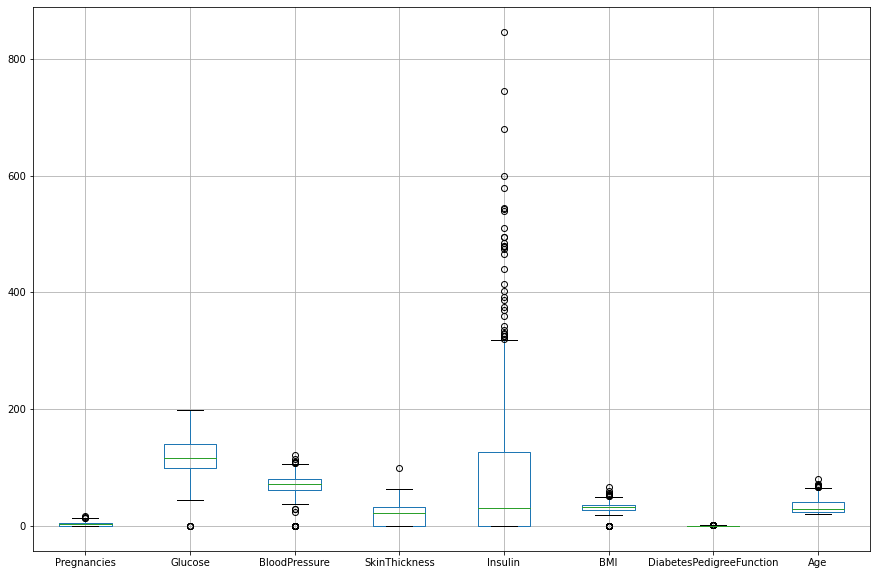

In [ ]:
diabetes.drop('Outcome',axis=1).boxplot(figsize=(15,10))

From the figure above we can see that there are some outlires from insulin feature, there is a value of 800. 


Below you can see the same figure as above, but in interactive way, so you can hover ans see the data values

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
data=diabetes.drop('Outcome',axis=1)
for col in data:
  fig.add_trace(go.Box(y=data[col].values, name=data[col].name))
  
fig.show()

In [ ]:
print("There is {} females with blood pressure of 0".format(len(diabetes[diabetes['BloodPressure']==0])))
print("There is {} females with BMI of 0".format(len(diabetes[diabetes['BMI']==0])))
print("There is {} females with Insulin of 0".format(len(diabetes[diabetes['Insulin']==0])))
print("There is {} females with SkinThickness of 0".format(len(diabetes[diabetes['SkinThickness']==0])))

There is 35 females with blood pressure of 0
There is 11 females with BMI of 0
There is 374 females with Insulin of 0
There is 227 females with SkinThickness of 0


**There is some wrong values,** like : <br>
- **BMI** : There is some participants with BMI 0 and that's not real.<br>
- **BloodPressure**: There is some participants with BloodPressure 0 ,there is no blood pressure of 0. <br>
- **SkinThickness**: there is a lot of values with 0 skin thickness and these values is not real, the minimum skin thickness is 10mm.
there is also some papers and article that provide some evidence that there is some correlation between the skinthickness and the diabetes https://pubmed.ncbi.nlm.nih.gov/2079616/ .
- **Insulin** - Insulin cannot be 0 in healthy people<br>


**Suggested solution:**
 
1.   Replacing all the zero values with **NAN** values, we want to deal with values as a missing values
2.   Imputing theses missing values by using the KNN Imputer.





In [ ]:
df=diabetes.copy()
# copy the data from the original dataset to a new variable called df.
df2=diabetes.copy()
# another copy 

In [ ]:

# the columns that have zero values - we want to covert them to NAN, and fill them with  a valus after using the KNN IMPUTER.
columns_to_fill = ['BloodPressure','BMI','Glucose','SkinThickness','Insulin' ]

In [ ]:
df['BloodPressure'].replace(to_replace = 0, value = np.NaN,inplace=True)
df['BMI'].replace(to_replace = 0, value = np.NaN,inplace=True)
df['Glucose'].replace(to_replace = 0, value = np.NaN,inplace=True)
df['SkinThickness'].replace(to_replace = 0, value = np.NaN,inplace=True)
df['Insulin'].replace(to_replace = 0, value = np.NaN,inplace=True)

In [ ]:
max_values=[(df[val].max()- df[val].min(),df[val].min()) for val in df.columns] 
# We will use the vaLues in the list to return to the orignial values before scaling with the KNN imputer . 
# minmax_scaler = x-min/(max-min)
#the values in the minmax_scaler have the values (mix-min), (min)

## **Visualizing the missing values**

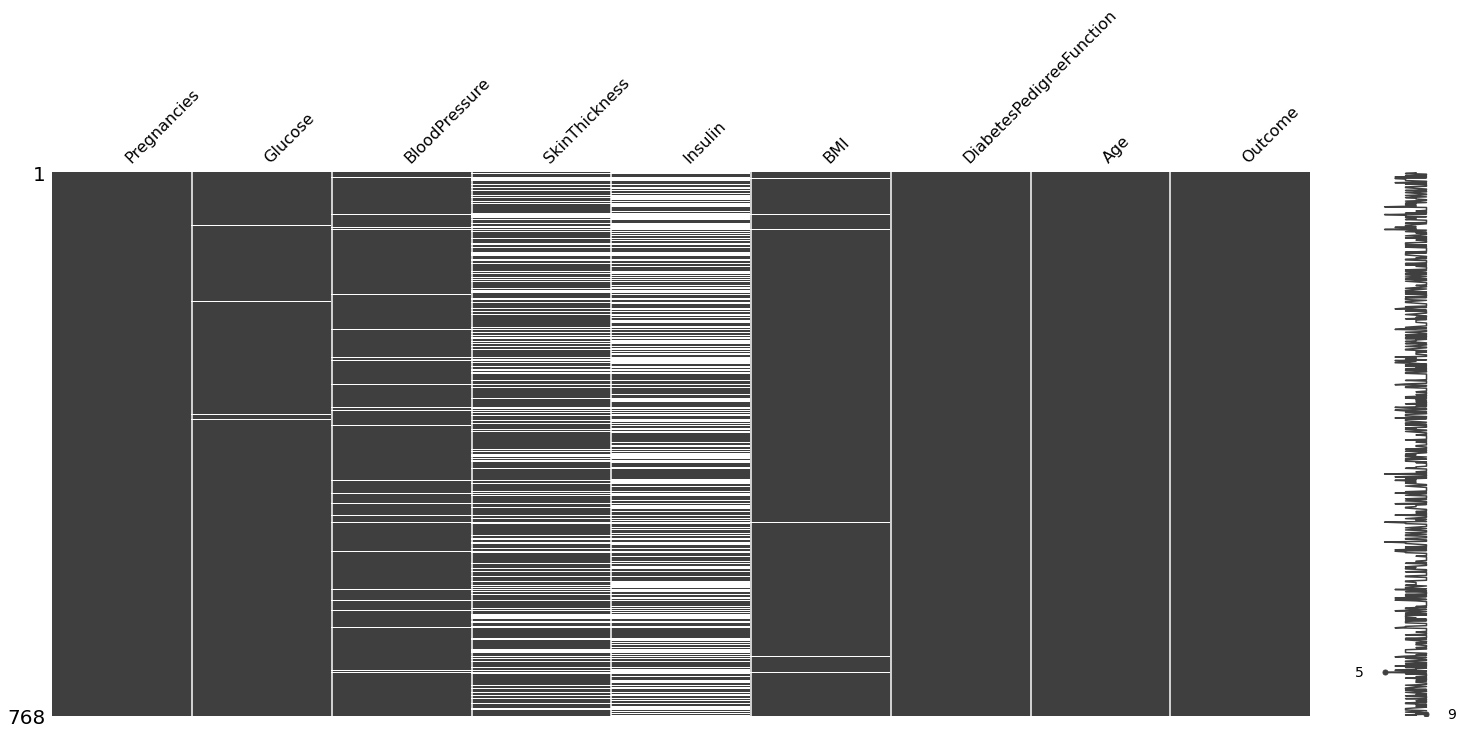

In [ ]:

import missingno as msno
# import tha package of missingno
msno.matrix(df)
# visualize the missing values

We can see from the matrix above all the places of the missing values in our dataset

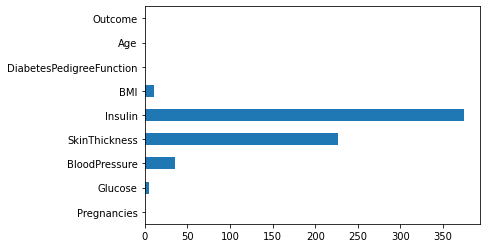

In [ ]:
df.isnull().sum().plot(kind='barh')

We can see from the graph above that there is also alot of missing values in the insulin feature and the skinthickness.

## **Impute missing values** :
- Limit our ability to visualize the data 
- It can reduce the statistical power of our model
- It can also reduce the numbers of each groups, it can also uppresent or underpresent some groups
- It maybe lead to invalid conclusions.

[reference](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)


We will use the KNN imputer to fill the NaN values :
- First we will normalize the data <BR>
"The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables." 
referrence : https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637


In [ ]:
#First we will normalize the data by using the minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
# we will use the KNN imputer to Impute tha NAN values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df=pd.DataFrame(imputer.fit_transform(df),columns = df.columns)


In [ ]:
df.head()
# these is how the data is look like after normalization 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.279808,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.061659,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.230435,0.272476,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
df.isnull().sum()
# check one more tine if there is somthing NAN after imputing he NAN values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Returning the original values to the all the columns by multiplying tem with the max value from the original dataset 

In [ ]:

#cop the new data
df1=df.copy()
# in the foor loop below we convert the values that we normalizaed vefore to the orignal values b multiplying them 
# with ( max-min) + min
for val,max_val in zip(df.columns,max_values):
  if val=='DiabetesPedigreeFunction':
    df1[val]=(df[val]*max_val[0])+max_val[1]
  else:
    df1[val]=round((df[val]*max_val[0])+max_val[1])

In [ ]:
df1.head()
# the data after converting the normalized data to the original one

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,247.0,34.0,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,65.0,27.0,0.351,31.0,0.0
2,8.0,183.0,64.0,28.0,241.0,23.0,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.0,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.0,2.288,33.0,1.0


## **outliers** 

Now we will check if there is outliers and delete them
we will use the IQR:
"The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1." by wekipedia [IQR](https://en.wikipedia.org/wiki/Interquartile_range)

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      42.0000
BloodPressure                16.0000
SkinThickness                12.0000
Insulin                     100.2500
BMI                           9.0000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [ ]:
diabetes_df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_df_out.shape

(679, 9)

In [ ]:
df1=diabetes_df_out.copy()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
data=diabetes_df_out.drop('Outcome',axis=1)
for col in data:
  fig.add_trace(go.Box(y=data[col].values, name=data[col].name))
  
fig.show()

Now our data is clean, without outliers and without a wrong values. 
the data set now have 680 rows and 8 features.

# **Data visulaization and exploration**

## **What is the percentange of particpants who have diabetes?**





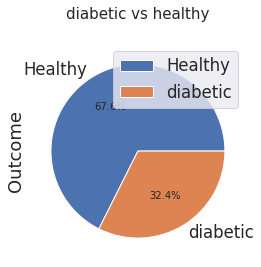

In [ ]:

# plot the percentage of the healthy and the diabetic people.
df1['Outcome'].value_counts().plot.pie(autopct="%.1f%%",labels=['Healthy','diabetic'])
# adding title 
plt.title("diabetic vs healthy\n",fontsize=15)
# adding legend
plt.legend(['Healthy','diabetic'])

Fromt the pie plot above we can see that 34.4% of the participants have diabetes, while 65.6% don't have diabetes.


## **Glucose level categories** 

here we want to make categories of the Glucose levels like: <br>
- '**Normal**: Glucose < 140 '
- '**prediabetes**:Glucose - 140-200'
----


**Type 2 diabetes** - by mayo clinic <br>
If you're being tested for type 2 diabetes, two hours after drinking the glucose solution:

- A **normal** blood glucose level is **< 140 mg/dL** (7.8 mmol/L).
- A blood glucose level between **140 and 199 mg/dL** (7.8 and 11 mmol/L) is considered impaired glucose tolerance, or **prediabetes.** 
If you have prediabetes, you're at risk of eventually developing type 2 
diabetes. 
- A blood glucose level of **>=200 mg/dL (11.1 mmol/L)** may indicate **diabetes**.

reference : https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296

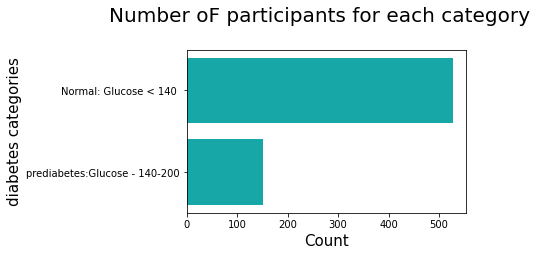

In [ ]:
bins = [0,140,200]
labels = ['Normal: Glucose < 140 ','prediabetes:Glucose - 140-200']
df1['diabetes_cateogty']=pd.cut(df1['Glucose'], bins=bins, labels=labels)
f, ax = plt.subplots(figsize=(5, 3))
sns.countplot(y="diabetes_cateogty", data=df1, color="c")
ax.set_xlabel('Count',fontsize=15)
ax.set_ylabel('diabetes categories',fontsize=15)
ax.set_title( "Number oF participants for each category  \n " , size = 20 )
plt.show()
#plt.savefig("count of delay for each departure category.png")
#https://labtestsonline.org/tests/glucose-tolerance-test

From the figure above we can see that:
- ~ 580 participants who have a glocose level < 140 will be normal by the category that we define above.<br>
- ~ 200 of the participnats have glucose level higher than 140 which mean that they maybe have diabetes.

Now we want to check our datasets. How much participants from each category is really categorized as having diabetes or not.


In [ ]:
diabetes_category=pd.pivot_table(data=df1, index='diabetes_cateogty', columns='Outcome', aggfunc='count',fill_value=0,margins=True)['Glucose']
diabetes_category.columns=['No diabetes','diabetes','All']
diabetes_category['No diabetes']=diabetes_category['No diabetes']/diabetes_category['All']
diabetes_category['diabetes']=diabetes_category['diabetes']/diabetes_category['All']
diabetes_category.drop('All',axis=1,inplace=True)
diabetes_category.drop('All',inplace=True)

In [ ]:
diabetes_category

,No diabetes,diabetes
diabetes_cateogty,,
Normal: Glucose < 140,0.781784,0.218216
prediabetes:Glucose - 140-200,0.309211,0.690789


Text(0, 0.5, 'Percent')

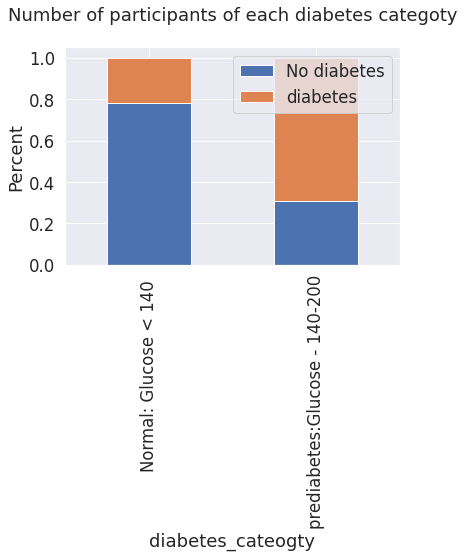

In [ ]:
diabetes_category.plot(kind='bar',stacked=True)
plt.title('Number of participants of each diabetes categoty\n')
plt.ylabel('Percent')

From the figure above we can see that approximately 76% of the particpants who have a glocuse level in the range 140-200 have a diabetes by the dataset of kaggle, and  ~24% of those have a glucose level < 140  dont really have a diabeties. 


## **Features distribution**
To understand the shape of the data we will create a histogrms for the continues features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f698060c990>,
      dtype=object)

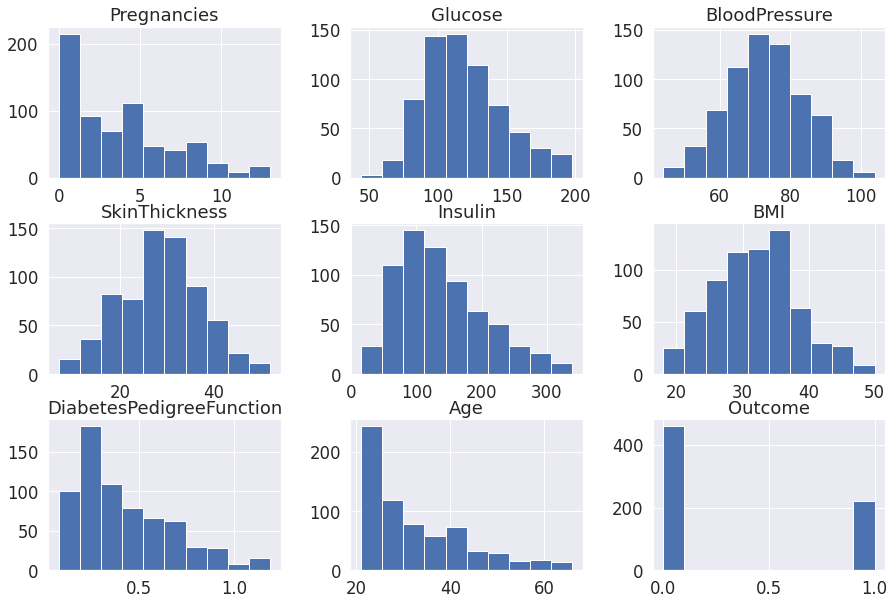

In [ ]:
df1.hist(figsize=(15,10))

From the figure above we can see a histogram for each variable in our dataset . and we can see if it is distributed normally or not . so we can see that the bloodpressure , glucose, skinthickness and BMI is distributed normally, while the pregnancies, Insulin, Age, Skin Thickness is not distributed normally .

## **Features correlation**

Now we want to check the if there is a correlation between the different features in our datase

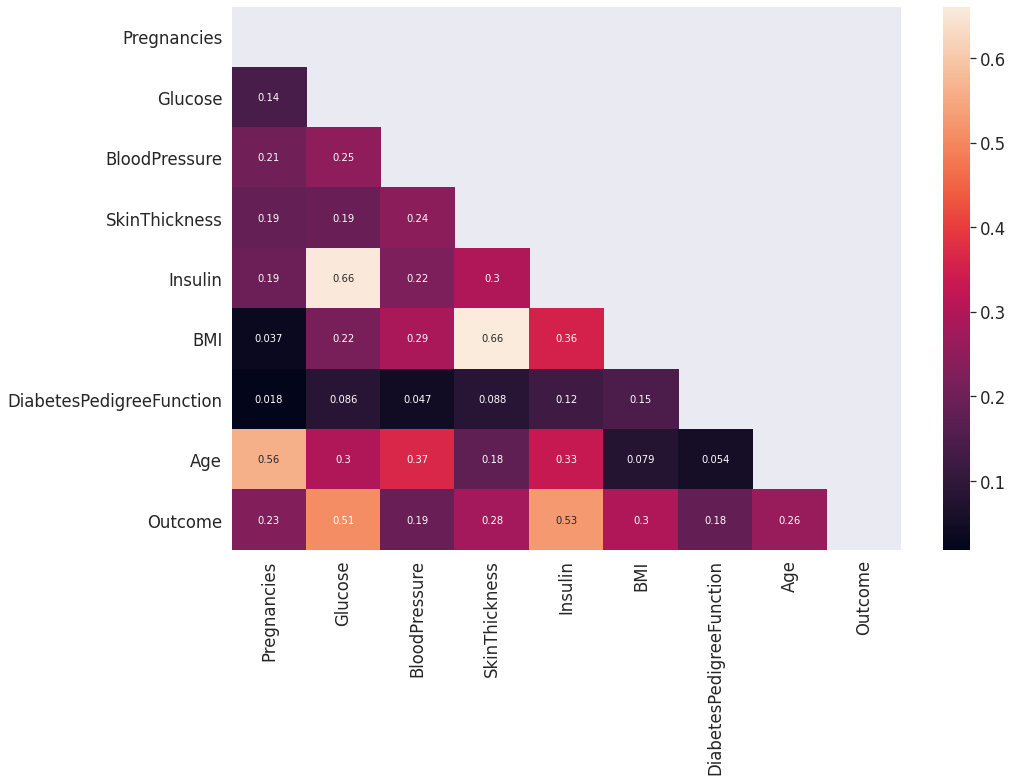

In [ ]:
### Feature correlations:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10)) 

matrix = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot=True, mask=matrix,ax=ax)

We can see from the figure above that there is no high correlation between the different features. but we can see in the least line the there a correlation of 0.5 betweent he glucos and the outcome, also a correlation of 0.41 between the insulin and the outcome.
We can see also that there is acoorelation of0.65 between the Skinthickness and the BMI. 
also there is a correlation between the glucose and the insulin ( correlation of 0.61)


**Pairplot** 

Here we want to see how different features correlated with each other


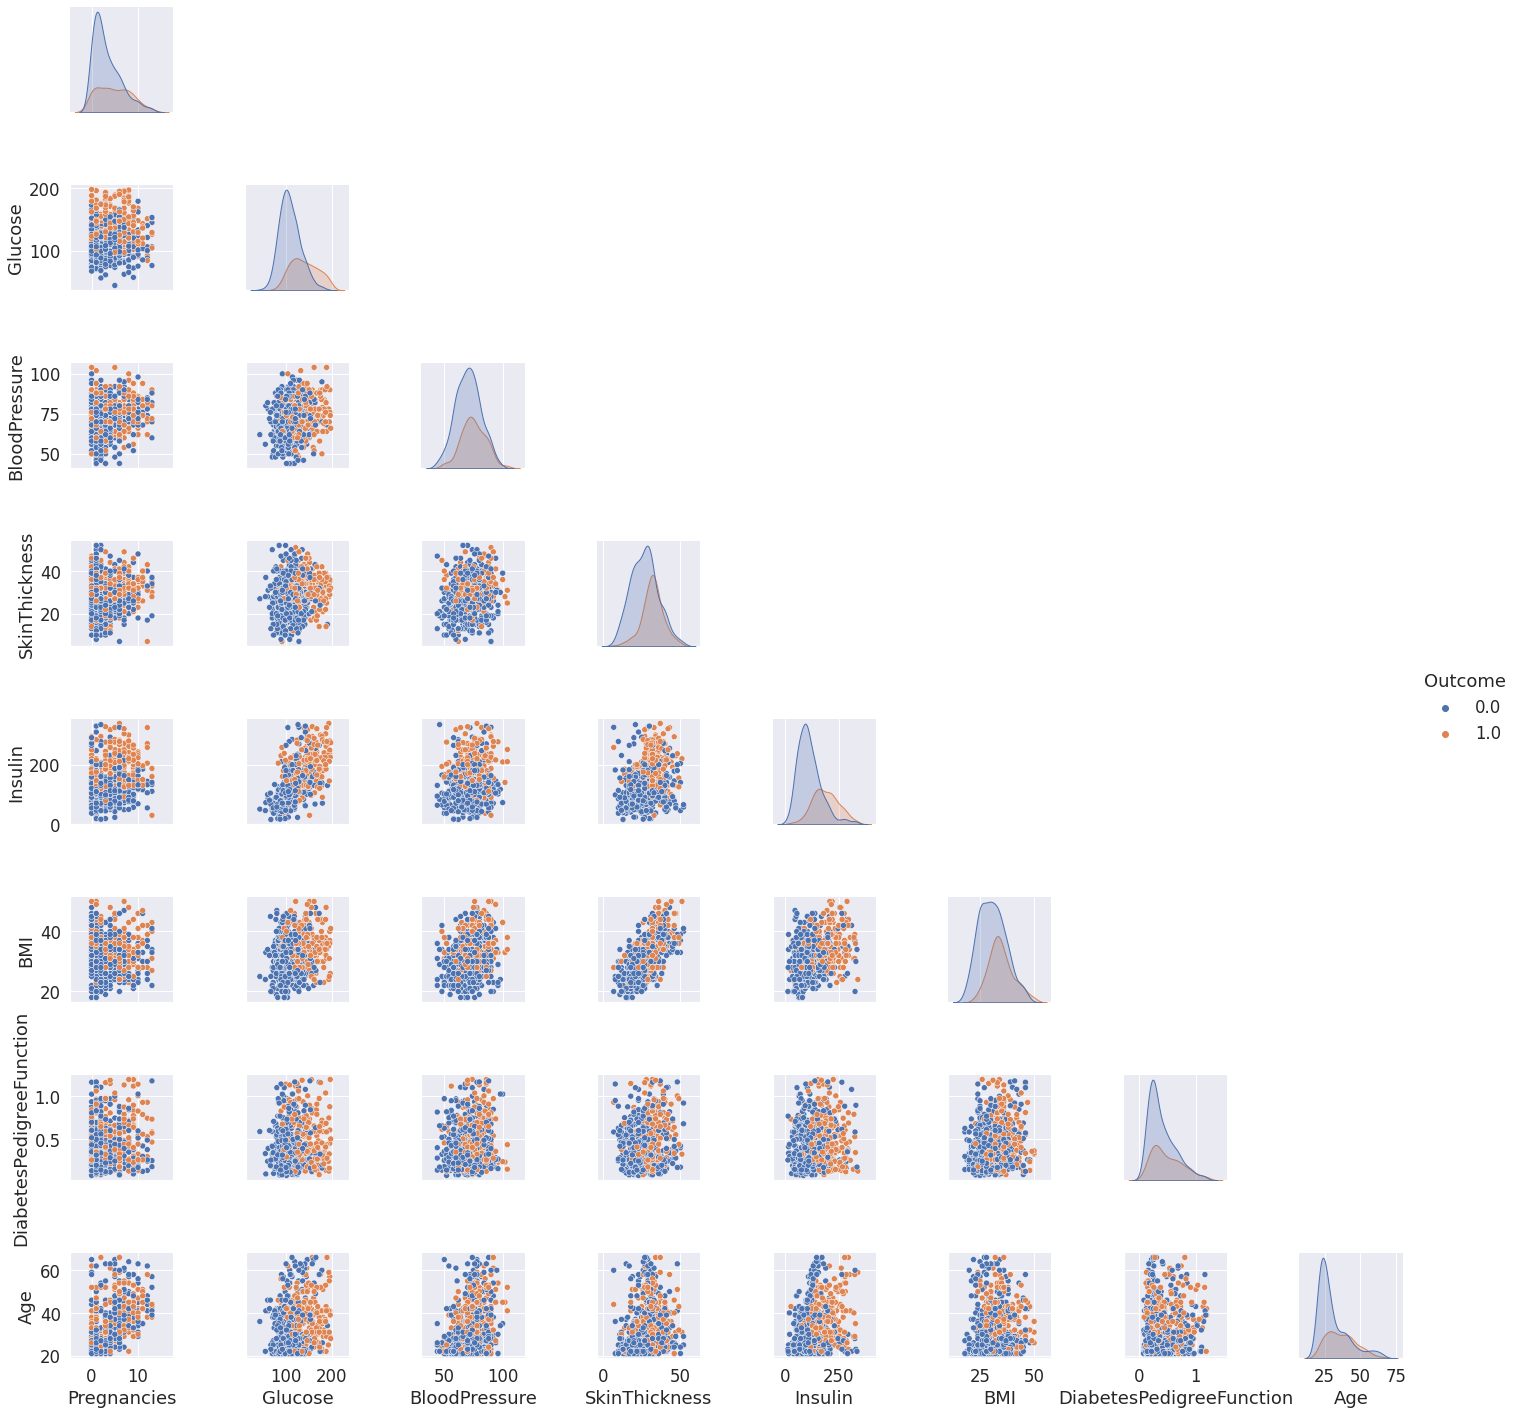

In [ ]:
sns.pairplot(df1,hue='Outcome',corner=True)

## **Age ranges, Insulin levels, Glucose levels and the outcome**


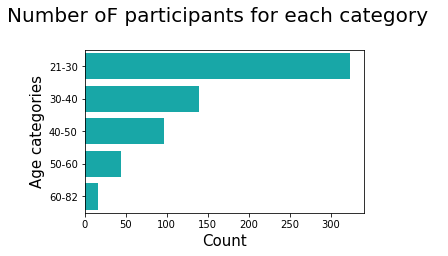

In [ ]:
bins = [21,30,40,50,60,82]
labels = ['21-30','30-40','40-50','50-60','60-82']
df1['age_category']=pd.cut(df1['Age'], bins=bins, labels=labels)
f, ax = plt.subplots(figsize=(5, 3))
sns.countplot(y="age_category", data=df1, color="c")
ax.set_xlabel('Count',fontsize=15)
ax.set_ylabel('Age categories',fontsize=15)
ax.set_title( "Number oF participants for each category  \n " , size = 20 )
plt.show()
#plt.savefig("count of delay for each departure category.png")

We can see from the figure above that the most of the participants are from the age 21-30, as the age increase, the number of the participant for each age category decrease.


**Insulin levels and glucose levels for the different age groups**

Is there a difference between insulin and glucose levels for each age group of diabetics and healthy people groups?

<Figure size 1080x720 with 0 Axes>

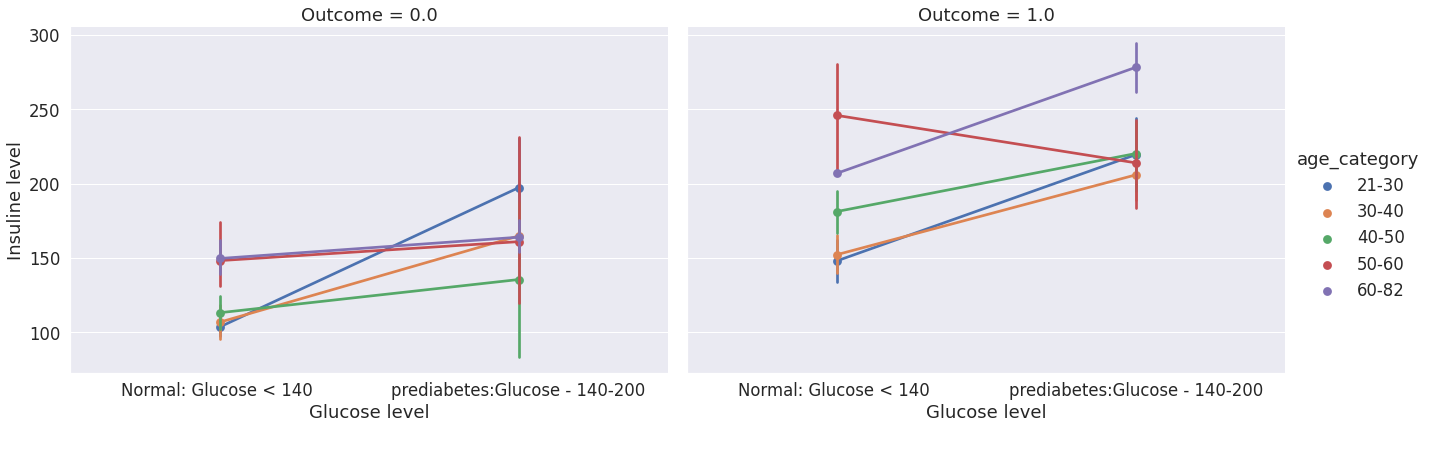

In [ ]:

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
g=sns.catplot(x="diabetes_cateogty", y="Insulin", hue="age_category",
                col="Outcome", data=df1,kind='point',
                height=6, aspect=1.5)

g.set_xlabels(label='Glucose level\n')
g.set_ylabels(label='Insuline level')
#g.col_names

We can see from the two figures above that:

- There is no difference between the levels of insulin for females who are
healthy and from ages 50-82 and who have glucos level higher than 140 or less than 140 . but for females who are youngers ( 21-40) we can see that there is a difference between the level of the insulin for those who have glucose level > 140 and those with glucise level<140 . as the glucose level in the blood increase the insulin must also increase.as we get older the insulin levles decrease, and that's what we see for the females older than 50 . 
- However, for diabetic females from the ages 50-60 there is a high difference between the levels of the insulin who have glucose<140 and  glucose > 140.
those who have glucose level>140 have less insulin than those have glucose level<140. the insulin levels must increase as the glucose level  increase, And it can indicate something wrong and may indicate a diabetes.



In [ ]:

# here we copied the data and save it in the df2 variable
df2=df1.copy()
#drop 2 variables that we dont need them
df2.drop(['diabetes_cateogty', 'age_category'],axis=1,inplace=True)

## Healthy vs diabetec females comparison
Now we want to compare between the distribution of each feature for the helathy and the diabetic participants.<br> 
- 0 - is for healthy people
- 1- for diabetic people

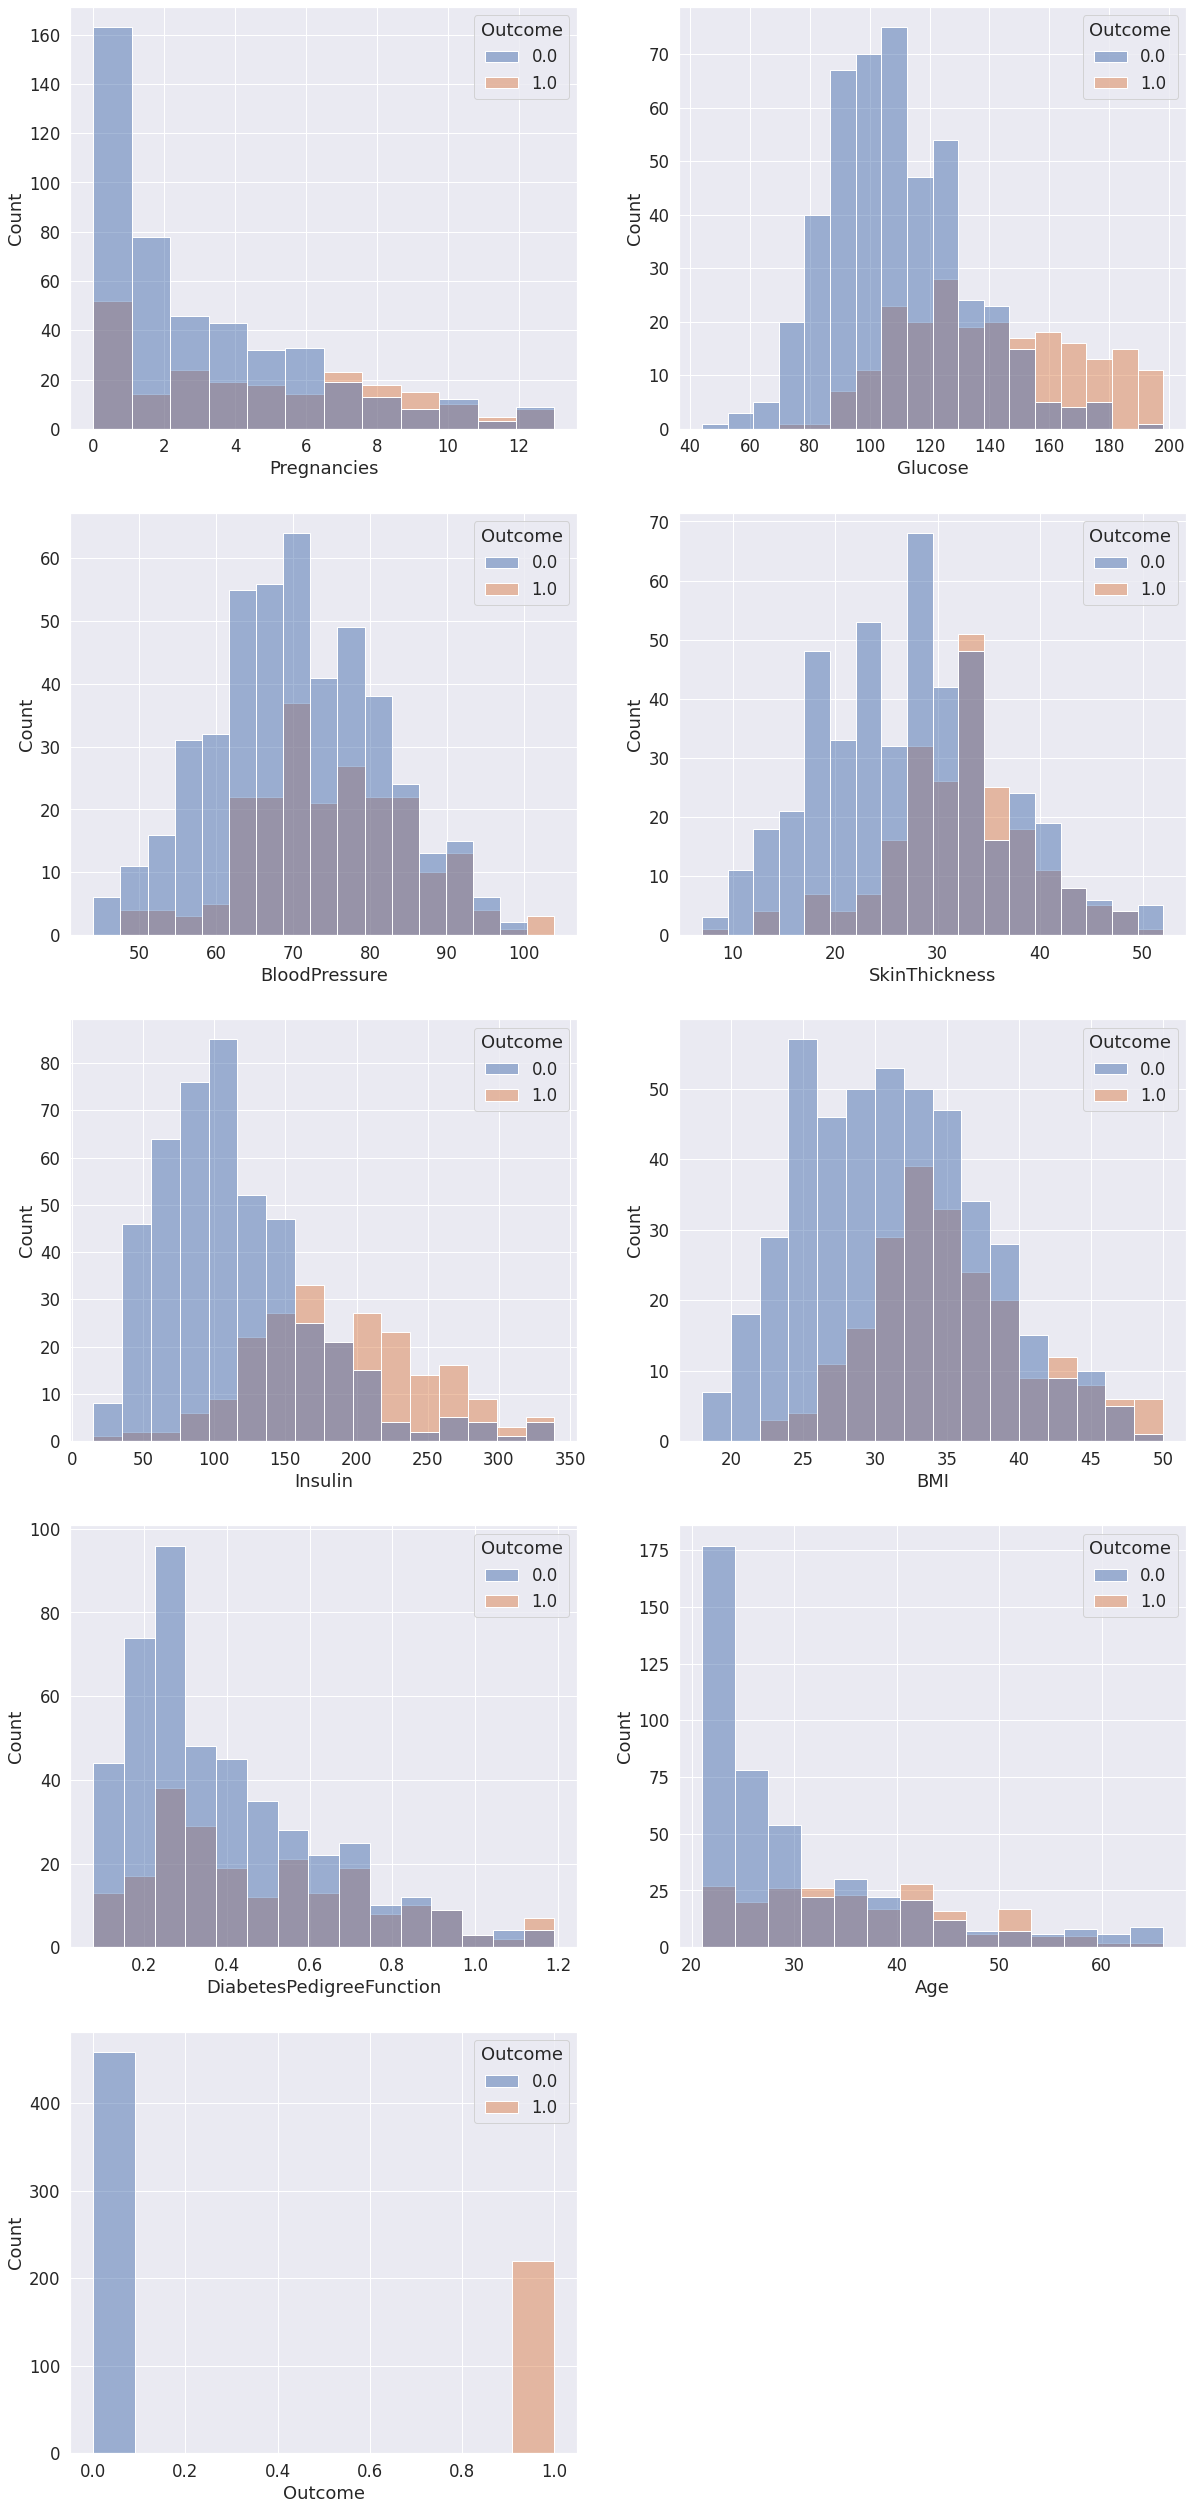

In [ ]:
fig = plt.figure(figsize=(20, 45))
for i, var in enumerate(list(df2.columns)):
  ax = fig.add_subplot(5, 2, i+1)
  sns.histplot(data=df1, x=var, hue="Outcome",ax=ax)

From the figure above we can see the disribution of each feature for the healthy and the diabetic participants. 




## **The statistical T-tests**
 Now we want to check if there is a significant statistical  difference between the different features of the two groups ( the healthy and the diabetic people). 
 we will use the T-test to check if there is a significant difference between the average of each fearture for each group- the healthy and the diabetic people.

In [ ]:
df_long = pd.melt(df2, 'Outcome', var_name='Feature', value_name='Value')
 # this is needed for the boxplots later on
 # here we are converting the dataframe from wide to long

In [ ]:
df_long.head()

,Outcome,Feature,Value
0,1.0,Pregnancies,6.0
1,0.0,Pregnancies,1.0
2,1.0,Pregnancies,8.0
3,0.0,Pregnancies,1.0
4,0.0,Pregnancies,5.0


In [ ]:
feature_names=list(df2.columns)
feature_names.remove('Outcome')
#Here we make a list of the features in the dataset

In [ ]:
#* Statistical tests for differences in the features across groups
from scipy import stats
# the list of t values
all_t = list()
# the p values
all_p = list()
for case in range(len(feature_names)):
    sub_df = df_long[df_long.Feature == feature_names[case]]
    #group 1 for healthy people
    g1 = sub_df[sub_df['Outcome'] == 0]['Value'].values
    #group 1 for diabetic people
    g2 = sub_df[sub_df['Outcome'] == 1]['Value'].values
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [ ]:
t, p = stats.ttest_ind(g1, g2)


In [ ]:
print(all_t)

[-6.168121224705044, -15.341664452099394, -5.103245847924271, -7.596189476566876, -16.156008837073284, -8.127079819960292, -4.819274668586656, -7.1136590755027385]


The t-value is negative (<0) then the mean of g1 (group 1: 0 healthy people) was significantly smaller than the mean of g2 (group 2: 1 diabetic people).

In [ ]:
print(np.count_nonzero(np.array(feature_names)[np.array(all_p) < 0.05]))
# here we print the number of all he features that are significantly higher/lower with have p-value < 0.05 

8


Now we want to visualize the features as boxplot for each group ( the healthy vs diabetic) and check if there is a significant difference.

<Figure size 2160x3240 with 0 Axes>

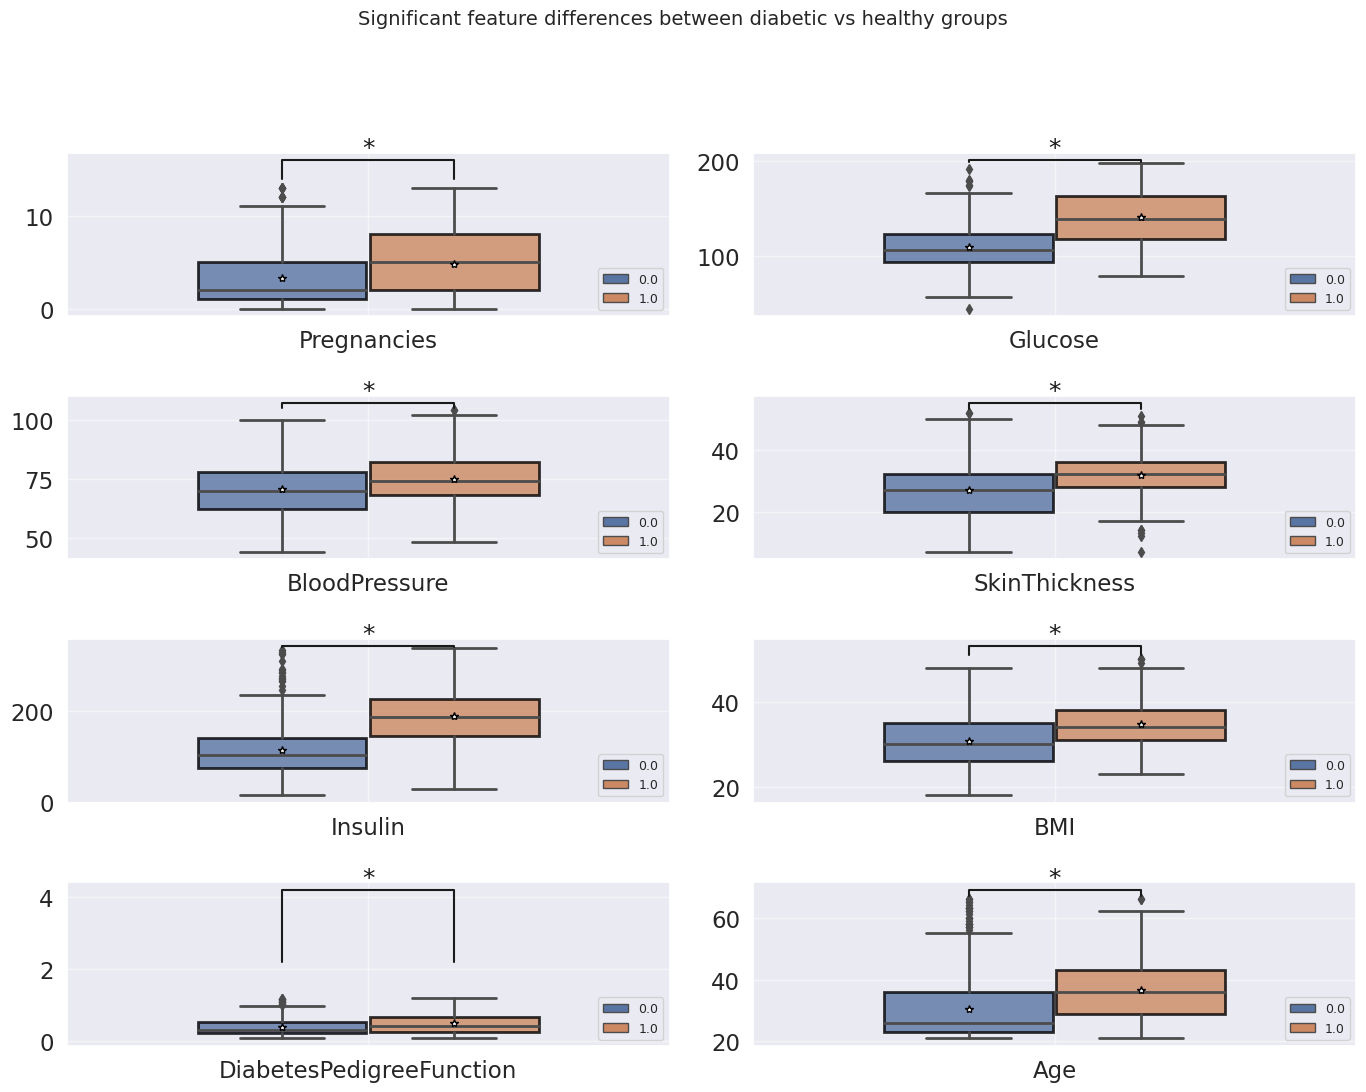

In [ ]:
# renaming so that class 0 will appear as setosa and class 1 as versicolor
classes_names=[0,1]
fig = plt.figure(figsize=(30, 45))
df_long.loc[df_long.Outcome==0, 'Outcome'] = classes_names[0]
df_long.loc[df_long.Outcome==1, 'Outcome'] = classes_names[1]
# Boxplots
fig, axes = plt.subplots(4,2,figsize=(14,10), dpi=100)
axes = axes.flatten()
for idx, feature in enumerate(feature_names):
    ax = sns.boxplot(x="Feature", hue="Outcome", y="Value", data = df_long[df_long.Feature == feature], linewidth=2, showmeans=True, meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, ax=axes[idx])
    #* tick params
    axes[idx].set_xticklabels([str(feature)], rotation=0)
    axes[idx].set(xlabel=None)
    axes[idx].set(ylabel=None)
    axes[idx].grid(alpha=0.5)
    axes[idx].legend(loc="lower right", prop={'size': 9})
 
    #*set edge color = black
    for b in range(len(ax.artists)):
        ax.artists[b].set_edgecolor('black')
        ax.artists[b].set_alpha(0.8)
   
    #* statistical tests
    x1, x2 = -0.20, 0.20
    y, h, col = df_long[df_long.Feature == feature]["Value"].max()+1, 2, 'k'
    axes[idx].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    axes[idx].text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
fig.suptitle("Significant feature differences between diabetic vs healthy groups", size=14, y=1.1)
fig.tight_layout()

plt.show()

#reference : https://towardsdatascience.com/beautiful-boxplots-with-statistical-significance-annotation-e1b314927fc5

the mean value of each features of the diabetic group was statistically greater than the mean value of each feature for the healthy group.
like the average value of glucose, insulin, BMI,Age ..etc are significantly greater than the values for the healthy group



# **Machine learning**

Here we want to predict if the patients have diabetes or not . these problem is a classification problem (Supervised learning)
we will use classification models.

**Import packages**

In [ ]:

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# for data preprocessing
from sklearn.preprocessing import StandardScaler


# machine learning algorithms 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#package to validate the model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Package for model evaluaion
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

#package for hyper paramet tuning
from sklearn.model_selection import GridSearchCV

#packages for data balancing and Pipline
from sklearn.pipeline import Pipeline, make_pipeline
# reference :https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html
from imblearn.pipeline import Pipeline, make_pipeline

#saving the model
import pickle

#### **splitting the data**

In [ ]:
X = df2.drop(columns='Outcome',axis=1) # Features
y = df2.Outcome # Target variable

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### **Base line models**

Here we want to check which classification model perfomrs the best. 
We used Linear and Radial SVM, logestic regresion, KNN , descision tree and random forest. 
to validate the models we used 5 - fold cross validation. the metric that we used are precision, recall, f1 and accuracy.
We checked the metrics for eah model for the train and the test  to check if there is an overfitting/underfitting.
The final dataframe that we will get from the code below will include all the metric vales for each model (it will be in arrays because there is 5 cross validation)*italicized text*


**Baseline models**

In [ ]:

result_list=[]
# empty list to save the allt he results for the train and the test set 
SEED=222

classifiers_names=['Linear Svm','Logistic Regression','KNN','Decision Tree','Random Forest']

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
#knn = KNeighborsClassifier(n_neighbors=10)
scaled_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10))

#svc=SVC(random_state=SEED)
scaled_svc = make_pipeline(StandardScaler(), svm.SVC(kernel='linear',random_state=SEED))

# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

# Instantiate randomforest

rf=RandomForestClassifier(n_estimators=100,random_state=SEED)



# Define the list classifiers
classifiers = [('Support vector',scaled_svc),('Logistic Regression', lr), ('K Nearest Neighbours', scaled_knn), ('Classification Tree', dt), ('Random forest', rf)]

# Define the scoring metrics that we will use to evaluatae the models.
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']

for classifier in classifiers:
     cv_result = cross_validate(classifier[1],X_train,y_train, cv = 5,scoring = scoring, return_train_score=True)
     result_list.append(cv_result)
    

# # transform the list of results to a dataframe
new_models_dataframe2=pd.DataFrame(result_list,index=classifiers_names)  
# #new_models_dataframe2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**new_models_dataframe2:** From the dataframe above we can see that each estimator ( in the index of the dataframe) have multi features like train_precision etc.. the values are in an numpy array ( because we have 5 fold cv), so wee need to take each element of these array and put it in a single row with the same different values.

In [ ]:
new_models_dataframe2

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
Linear Svm,"[0.01180577278137207, 0.020106077194213867, 0....","[0.006121635437011719, 0.0063419342041015625, ...","[0.6896551724137931, 0.68, 0.75, 0.6875, 0.714...","[0.75, 0.7326732673267327, 0.72, 0.71287128712...","[0.625, 0.53125, 0.5625, 0.6666666666666666, 0...","[0.6046511627906976, 0.5736434108527132, 0.558...","[0.6557377049180328, 0.5964912280701754, 0.642...","[0.6695278969957081, 0.6434782608695653, 0.628...","[0.7941176470588235, 0.7745098039215687, 0.803...","[0.8108108108108109, 0.7985257985257985, 0.791...","[0.8566964285714287, 0.8446428571428571, 0.850...","[0.8709776364954549, 0.8764988009592326, 0.875..."
Logistic Regression,"[0.038797616958618164, 0.03360390663146973, 0....","[0.005555868148803711, 0.01636528968811035, 0....","[0.7, 0.6538461538461539, 0.75, 0.696969696969...","[0.7264150943396226, 0.7281553398058253, 0.705...","[0.65625, 0.53125, 0.5625, 0.696969696969697, ...","[0.5968992248062015, 0.5813953488372093, 0.558...","[0.6774193548387096, 0.5862068965517242, 0.642...","[0.6553191489361702, 0.646551724137931, 0.6233...","[0.803921568627451, 0.7647058823529411, 0.8039...","[0.800982800982801, 0.7985257985257985, 0.7862...","[0.8589285714285715, 0.8410714285714287, 0.849...","[0.8705035971223022, 0.8764709162902236, 0.875..."
KNN,"[0.005261898040771484, 0.0029213428497314453, ...","[0.01830744743347168, 0.0199887752532959, 0.01...","[0.7037037037037037, 0.6666666666666666, 0.708...","[0.7684210526315789, 0.8105263157894737, 0.797...","[0.59375, 0.375, 0.53125, 0.5151515151515151, ...","[0.5658914728682171, 0.5968992248062015, 0.550...","[0.6440677966101694, 0.4800000000000001, 0.607...","[0.6517857142857143, 0.6874999999999999, 0.651...","[0.7941176470588235, 0.7450980392156863, 0.784...","[0.8083538083538083, 0.828009828009828, 0.8132...","[0.8763392857142858, 0.8183035714285716, 0.837...","[0.8859517037532765, 0.9176983994199989, 0.900..."
Decision Tree,"[0.0036067962646484375, 0.003229856491088867, ...","[0.005343198776245117, 0.005163431167602539, 0...","[0.6285714285714286, 0.3783783783783784, 0.607...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.6875, 0.4375, 0.53125, 0.48484848484848486,...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.6567164179104478, 0.40579710144927533, 0.56...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.7745098039215687, 0.5980392156862745, 0.745...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.750892857142857, 0.5544642857142857, 0.6870...","[1.0, 1.0, 1.0, 1.0, 1.0]"
Random Forest,"[0.15242695808410645, 0.14981937408447266, 0.1...","[0.02593708038330078, 0.024394750595092773, 0....","[0.75, 0.5862068965517241, 0.7407407407407407,...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.5625, 0.53125, 0.625, 0.5757575757575758, 0...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.6428571428571429, 0.5573770491803278, 0.677...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.803921568627451, 0.7352941176470589, 0.8137...","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.8734375, 0.8345982142857143, 0.868303571428...","[1.0, 1.0, 1.0, 1.0, 1.0]"


**Organizing the dataframe above to visualizae it**

In [ ]:
new_df=new_models_dataframe2.copy() # making a copy of the data
new_df.drop(columns=['fit_time','score_time'],axis=1,inplace=True) # droping the fit time and score time dont nteed them.

new_df=new_df.T.unstack().to_frame().reset_index() # here we chane the dataframe from wide data frame to long.
new_df.columns=['model','train_test','value']
new_df[['train_test','metric']] =new_df['train_test'].str.split("_",expand=True)[[0,1]]



In [ ]:
# 
new_df1=pd.DataFrame(columns=list(new_df.columns)) # here we make a new dataframe - with no values. we will inset a values from the new_df dataframe.
value=[]
model=[]
train_test=[]
metric=[]
for iter,i in enumerate(new_df.value):  
  #print(i)
  for x in range(i.size):
    value.append(new_df['value'][iter][x])
    model.append(new_df['model'][iter])
    train_test.append(new_df['train_test'][iter])
    metric.append(new_df['metric'][iter])

# create a new dataframe
new_df1['metric']=metric
new_df1['value']=value
new_df1['train_test']=train_test
new_df1['model']=model    

##### **Compare the accuracy for each model**

Here we want to compare between the different models




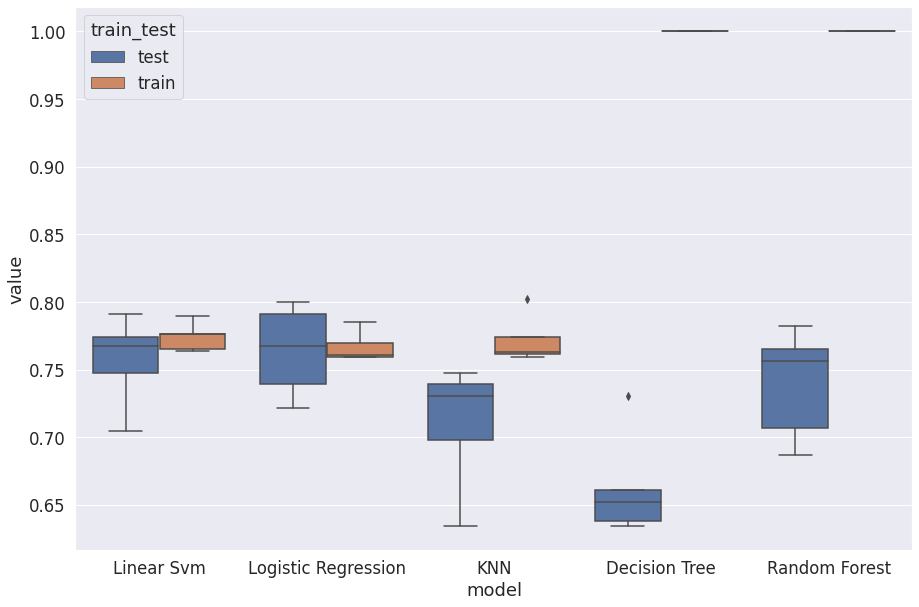

In [ ]:
sub_df_accuracy = new_df1[new_df1.metric == 'accuracy']
#sub_df_accuracy
fig = plt.figure(figsize=(15, 10))
sns.boxplot(data=sub_df_accuracy,x='model', y='value',hue='train_test',whis=2)

In the graph above we can see that there is a high difference between the accuracy of the train and the test in the different models

##### **comparion between the different models**.

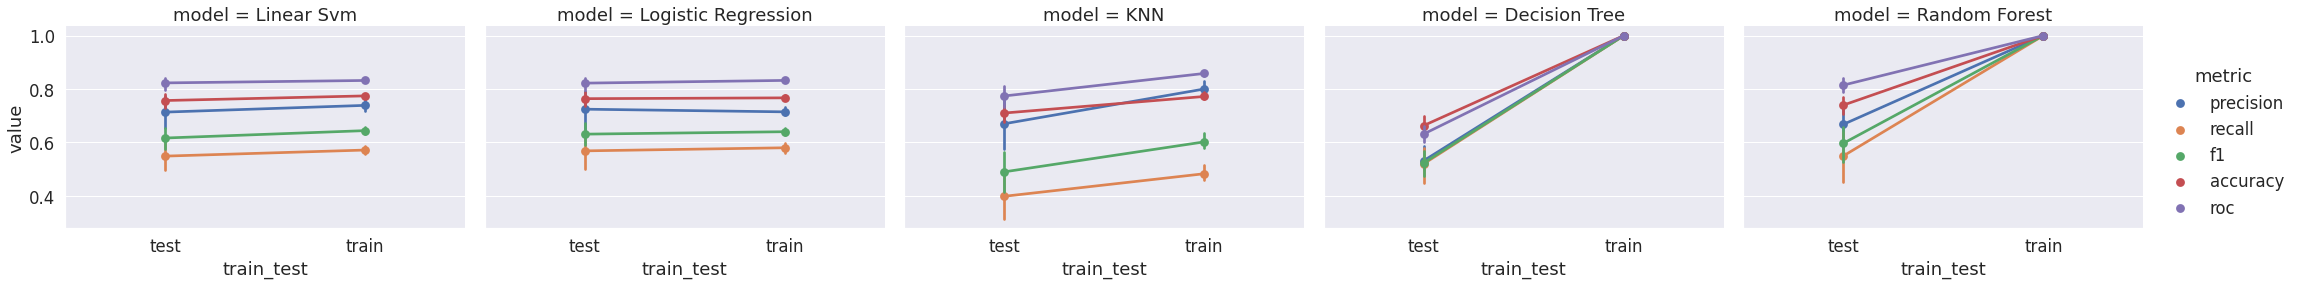

In [ ]:
g = sns.catplot(x="train_test", y="value",
                hue="metric", col="model",
                data=new_df1, kind="point",
                height=4, aspect=1.5);

<br><br>
From the figure above we can see the performance of each estimator with 5 cross validation. we can see also that there is some models which overfit, like the dicision tree and the random forest , we can see that the values for each metric in the train set is higher than the values in the test set.<br>
**The best** model here is : <br>
- **logestic regression** 
- **linear svm**.<br>

because there is no overfitting and there is no high difference between the metrics values in the train and test set.
we look at the f1-score and the roc_auc score because the labels ( 0 and 1 ) is not balanced, there is 32% diabetic,and 68% healthy .<br>
 **f1 score**:  represent the harmonic average of the precision and the recall.<br>
**precision** : is the proportion of positive identificaions was actually correct.
TP/TP+FP.<br>
**recall** : what is the proportion of actual positives was identified correctly .
[source](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
<br><br>


##### **Linear SVM vs Logistic regression**

We choose to continue with the SVM and the logistic regression models

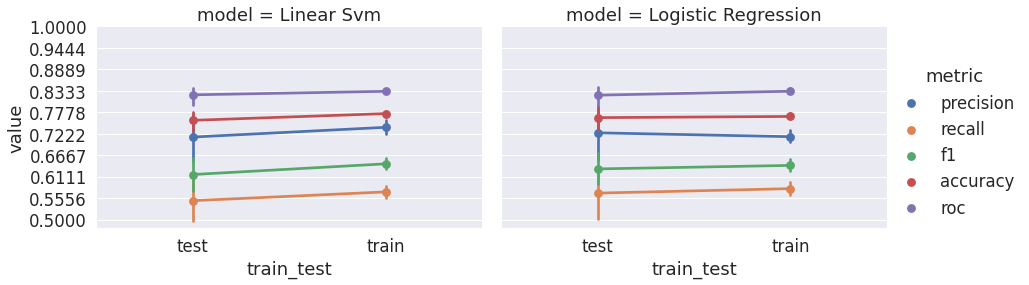

In [ ]:
g = sns.catplot(x="train_test", y="value",
                hue="metric", col="model",
                data=new_df1[new_df1['model'].isin(['Linear Svm','Logistic Regression'])], kind="point",
                height=4, aspect=1.5);

yticks=np.linspace(0.5,1,10)
g.set(yticks=yticks)              

From the figure above we can see the different metrics for the linear svm and the logistic regression, we can see also that the two models perform perform well in and there is no overfitting.

#### **Voting**
Because there is two models that performs the same, we will choose the voting method.
So we will combine multiple models into one using "Voting" and "Averaging".
The combined model will have better performance than any of the individual models, or at least, be as good as the best individual model. 
it is like the wisdom of the corwds
it is based on a group of individuals instead of a single expert.
Majority Voting is a technique which can only be applied to classification problems.

In [ ]:
# Voting Ensemble for Classification

SEED=1

estimators = []
model1 = LogisticRegression(random_state=SEED)
estimators.append(('logistic', model1))
#model2 = DecisionTreeClassifier()
#estimators.append(('cart', model2))
model3 = make_pipeline(StandardScaler(), svm.SVC(kernel='linear',random_state=SEED,probability=True))
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
results = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='roc_auc')
ensemble.fit(X_train,y_train)
print(results.mean())

#source:https://www.datacamp.com/community/tutorials/ensemble-learning-python

the average of the roc_auc is : 0.8232178171202561
the std of the roc_auc is :0.028069217691342574 


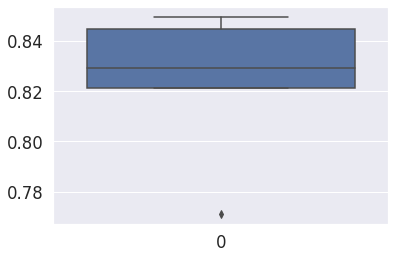

In [ ]:
print('the average of the roc_auc is : {}'.format(results.mean()))
print('the std of the roc_auc is :{} '.format(results.std()))
sns.boxplot(data=results)


From the boxplot above we can see the range of roc_auc score that we get from the 5 fold cross validation with the voting estimator ( svm + logistic regression). the roc_auc is 82.1%

##### **Model evaluation**

In [ ]:

print('the roc auc score for the training data is: {0}'.format(roc_auc_score(y_train,ensemble.predict_proba(X_train)[:, 1])))
print('the roc auc score for the testing data is: {0}'.format(roc_auc_score(y_test,ensemble.predict_proba(X_test)[:, 1])))

the roc auc score for the training data is: 0.8309761217528209
the roc auc score for the testing data is: 0.8616625310173698


###### Classifiaction reports

In [ ]:

# classification report for tha training data 
print(classification_report(y_train,ensemble.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       370
           1       0.72      0.58      0.64       206

    accuracy                           0.77       576
   macro avg       0.75      0.73      0.73       576
weighted avg       0.76      0.77      0.76       576



In [ ]:

# classification report for tha test data 
print(classification_report(y_test,ensemble.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



from the two classification reports above we can see that there is no high difference between the different evaluation metrics for the voting estimator.

###### **Confusion matrix**

Text(0.5, 4.5, 'Predicted label')

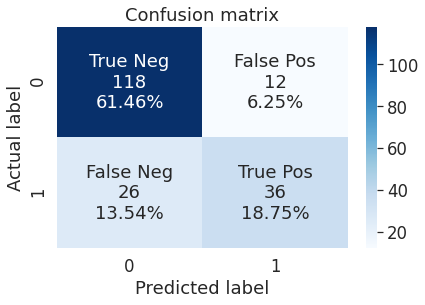

In [ ]:

cf_matrix= confusion_matrix(y_test, ensemble.predict(X_test))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

From the confusion matrix above we can see that the voting model make a lot of False negative prediction, there was 26 patients that wad diabetic but the model classifiy them as healthy. 

###### **Roc auc graph**

Here we calculate the true-positive rate and false-positive rate for each threshold. after that we will plot the true postive / false positive rate at every possible threshold
If the AUC is greater than 0.5, the model is better than random guessing.
[Refernece ](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.<BR>
"The AUC value is equivalent to the probability that a randomly chosen positive example is ranked higher than a randomly chosen negative example."


**TPR=TR/(TP+FN)** =RECALL <BR>
**FPR=FP/(FP+TN)**

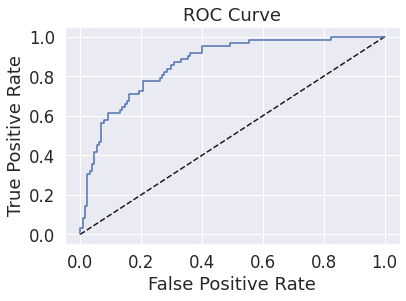

array([1.95939246, 0.95939246, 0.95914749, 0.95119345, 0.91310857,
       0.90823499, 0.86159715, 0.84689291, 0.74154706, 0.73793655,
       0.72769951, 0.71852599, 0.70396854, 0.70074406, 0.65867688,
       0.65864556, 0.64896755, 0.6486663 , 0.64187635, 0.63925704,
       0.56814623, 0.54388568, 0.5245715 , 0.5118946 , 0.49487096,
       0.47087373, 0.46461862, 0.45793651, 0.44772709, 0.44260986,
       0.4314142 , 0.42443565, 0.42430105, 0.40250813, 0.40013376,
       0.37732759, 0.37466548, 0.3654426 , 0.36055459, 0.32452722,
       0.3240982 , 0.31129678, 0.30583023, 0.30098507, 0.29896634,
       0.29820511, 0.29760298, 0.29423429, 0.29003409, 0.28977006,
       0.28152465, 0.25049025, 0.24918261, 0.2396455 , 0.23809188,
       0.23580215, 0.22729324, 0.21241255, 0.20908285, 0.1786823 ,
       0.17775157, 0.14799373, 0.1451822 , 0.08519709, 0.08259072,
       0.00271512])

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = ensemble.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
thresholds

**Save the model**

In [ ]:
# save the model to disk
import pickle
filename = 'voting_model_diabetes.sav'
pickle.dump(ensemble, open(filename, 'wb'))

##### **Hyper parameter tuning**





- We will search for the best combination of **'C'** and **'gamma'** for the linear svm model<br>
and the **'C'** and **'max_iter'** for the logistic regression using **GridSearchCV** to maximiz the **ROC_AUC**.
- we will use the grid search with 5 cross validation.
after that we will evaluate the best model and compare it to the model before hyper parameter tuning.<br>
Note: 'C' is a regularization parameter

In [ ]:

# here is the model before the hyper parametr tuning .
ensemble

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svm',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                            

In [ ]:
#Use the key for the classifier followed by __ and the attribute
params = {'logistic__C': [1.0,1.5,2.0,2.5],
          'logistic__max_iter':[100,110,120,130,140],
          'svm__svc__C': [0.1, 1, 10],
          'svm__svc__gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
         
#'svm__svc__C': [0.1, 1, 10],
#'svm__svc__C' :gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(estimator=ensemble, param_grid=params, cv=5,scoring='roc_auc')

grid.fit(X_train,y_train)

###### **Model evaluation**

###### **Best estimator**

In [ ]:
grid.best_estimator_

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=2.5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svm',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                            

###### **Best score**

In [ ]:
grid.best_score_
# he best score for roc_auc in the cross validation was 85.4%

0.8248406943528893

In [ ]:

print('the roc auc score for the training data is: {0}'.format(roc_auc_score(y_train,grid.best_estimator_.predict_proba(X_train)[:, 1])))
print('the roc auc score for the testing data is: {0}'.format(roc_auc_score(y_test,grid.best_estimator_.predict_proba(X_test)[:, 1])))

the roc auc score for the training data is: 0.8303463657832589
the roc auc score for the testing data is: 0.8586848635235731


###### **Classification report**

In [ ]:
# classification report for tha training data 
print(classification_report(y_train,grid.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       370
           1       0.72      0.57      0.64       206

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.73       576
weighted avg       0.76      0.77      0.76       576



In [ ]:
# classification report for tha training data 
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192



###### **Confusion matrix**

Text(0.5, 4.5, 'Predicted label')

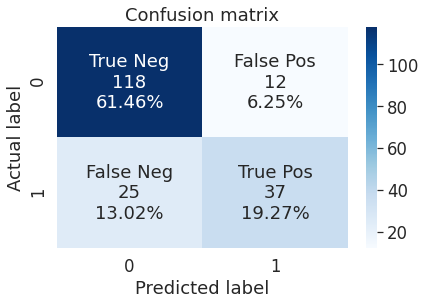

In [ ]:
cf_matrix= confusion_matrix(y_test, grid.best_estimator_.predict(X_test))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can see that there was no improvment after the grid search, the model still have the same FP and FN numbers . 

###### **Save the model**

In [ ]:
# save the model to disk
import pickle
filename = 'grid_voting_model_diabetes_final.sav'
pickle.dump(grid, open(filename, 'wb'))

###### **Check specifc examples**

Here I want to check if the model can predict some cases for feamles who have a glucose less than 140 and have diabetics 

In [ ]:
x_test1=df2[(df2['Glucose']<140) & (df2['Outcome'])==1]
y_test1=x_test1['Outcome']

In [ ]:
x_test1=x_test1.drop('Outcome',axis=1)

In [ ]:

accuracy_score(y_test1,grid.predict(x_test1))

0.21804511278195488

These model cannot predict truely the cases for females who have glucose less than 140 after the glucose tolerance and have diabetes.
these model can predict truely just 21.8% from these case.

##### **Feature Importance**
Here we want to see which variables had the biggest impact. 
- **"Negative coefficients** mean that on average, it can moves the prediction closer to being a negative example ( Healthy - no diabetes)". 
- **"Positive coefficients** move on closer to being classified as a positive example (diabetic), on average." [reference](https://stats.stackexchange.com/questions/184904/the-importance-of-the-features-for-a-logistic-regression-model)



**Logestic regression feature importance**

Text(0.5, 0, 'Importance')

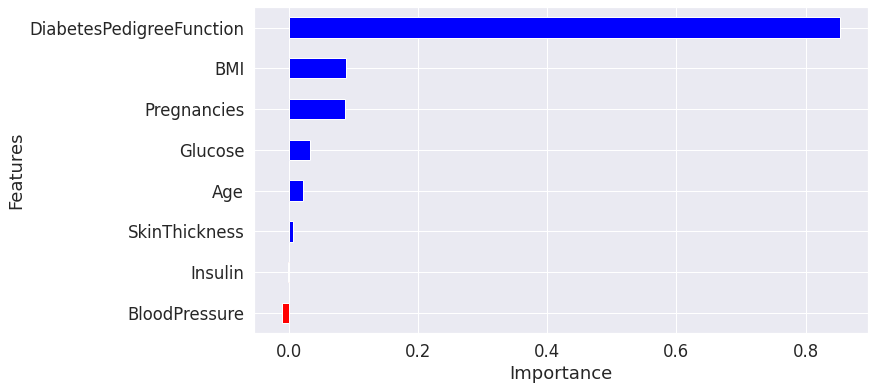

In [ ]:

#clf = ensemble.named_estimators_.logistic.coef_[0]
clf =grid.best_estimator_.named_estimators_.logistic.coef_[0]
    # #labels = list(df2.columns)
coeff = list(clf)
labels = list(df2.columns)
labels.remove('Outcome')
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

By using the logistic regression model, we can see that the most important feature to predict the diabetes status is the  diabetes pedigree function.

**SVM feature importance**

Text(0.5, 0, 'Importance')

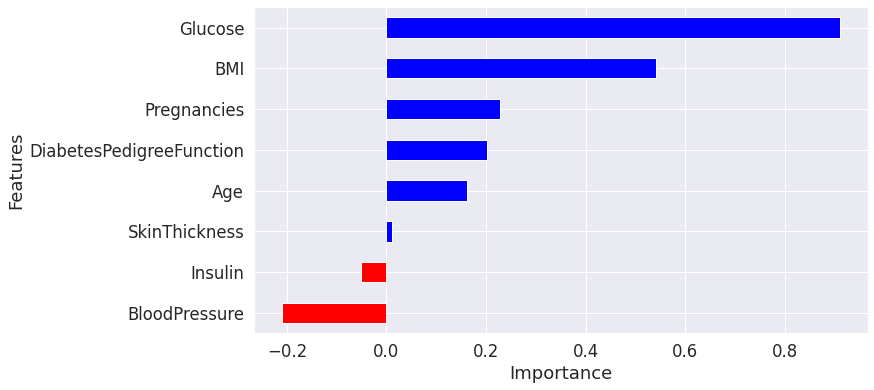

In [ ]:

#clf = ensemble.named_estimators_.logistic.coef_[0]
clf =grid.best_estimator_.named_estimators_.svm.named_steps.svc.coef_[0]
    # #labels = list(df2.columns)
coeff = list(clf)
labels = list(df2.columns)
labels.remove('Outcome')
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the feature above we can see that the most important feature in the SVM model to predict if there is a diabetic or not is he glucose and the insulin, and thats what we hear from the doctors. 

# **Summary**

The project aimed to investigate the potential to develop a predictive model to predict  if a patient have a diabetes or not using features collected from 
the national Institute of Diabetes and Digestive and Kidney Diseases, from 758 females.these data was collected before 23 year ( 1998).the data also unbalanced, it have 32% diabetic females  and 68% healthy females.

The results from the model
can then be used to help identify if the patients have a diabetes or not. a voting estimator ( SVM and logistic regression)
was developed that achieved a weighted ROC AUC Score on the validation set of 0.83.
This model has potential but need to be improved more, maybe collecting more data and adding more features like if there is another background diseases,  smoking or not, the economic situation etc.

To improve the model more, we should focus on collecting data for females who have a glucose level less than 140 and have diabetes, because we noticed that the model didnt predict well these category and have just an accuracy of 21.2% (can predict just 21.2% from these category). in our dataset there was almost 190 cases for females who have glucose levels less than 140  after the glucose tolerance test and have diabetes. 
This will help to build classifiers that are better at  predicting the
diabetic females and decrease the flase negative ratio.

The importances of the features were determined using information extracted from each model in the voting estimator( the SVM model and the logistic regression).
By the **logistic regression model**, the most important feature was the 
Diabetes **Peidegree function** which is "a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.”, while by the **svm model** the most important feature was the **glucose level**, it is right because by the glucose tolerance test, doctors can classifiy the patients if she have a diabetes or not , so if he have glucise level higher than 140 she will be classified as diabetic.

we checked also the weighted f1-score which is the harmonic average of the precision and the accuracy, it was between 76% to 80% in the training and the testing set respectively.

At the end, these model have a potential but we need to add more data and features to improve it more. 

